In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 
import torch.autograd as autograd
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from logReg import LogitReg
from torch.nn import Parameter
from influence import influence
import time

In [2]:
'''training_data = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True),shuffle=True)
test_data =  torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, download=True),shuffle=True)



X_train = training_data.dataset.train_data.data.reshape(-1,784).type(torch.FloatTensor)/255
y_train = training_data.dataset.train_labels.data
X_test = test_data.dataset.test_data.data.reshape(-1,784).type(torch.FloatTensor)/255
y_test = test_data.dataset.test_labels


np.savez("../data/training_data.npz", X=X_train, Y= y_train)
np.savez("../data/test_data.npz", X=X_test, Y= y_test)'''

X_train = torch.from_numpy(np.load("../data/training_data.npz")["X"])
y_train = torch.from_numpy(np.load("../data/training_data.npz")["Y"])
X_test = torch.from_numpy(np.load("../data/test_data.npz")["X"])
y_test = torch.from_numpy(np.load("../data/test_data.npz")["Y"])



max_iter = 100
D_in = X_train.shape[1]
D_out = 10
N = X_train.shape[0]
weight_decay = 0.01

cls = LogitReg(max_iter, D_in, D_out, N, weight_decay)
cls.fit(X_train,y_train)
print("Training loss {}".format(cls.loss_fn(X_train, y_train)))
print( "Training accuracy {}". format( cls.score(X_train,y_train)))
print( "Test loss {}". format( cls.loss_fn(X_test,y_test)))
print( "Test accuracy {}". format( cls.score(X_test,y_test)))


LBFGS training took [67] iter.
After training with LBFGS: 
Training loss 0.41001251339912415
a 53993.0 b 60000
Training accuracy 0.8998833298683167
Test loss 0.3923059105873108
a 9056.0 b 10000
Test accuracy 0.9056000113487244


In [ ]:
influence(cls, X_train, y_train, X_test, y_test, max_inf = True, n_test_indices = 5, num_to_remove = 500, 
          n_max_inf = 60000, verify_influence = False)

0.015575590006510417
[20322 33048   134 38824 51432 37154 14631 25724 22095  9804]
influence 0.010570940144856772
label 1
(784,)


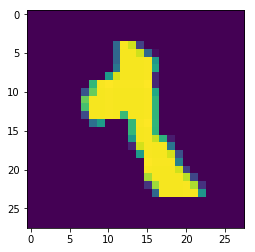

influence 0.010926706949869792
label 1
(784,)


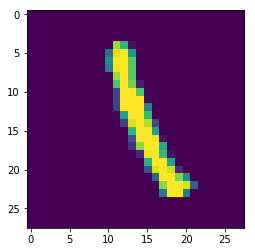

influence 0.011176243082682292
label 1
(784,)


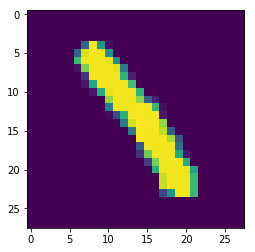

influence 0.011366067504882813
label 1
(784,)


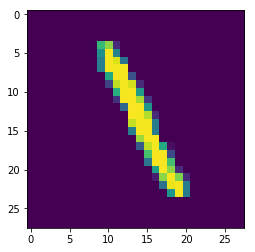

influence 0.011973658243815103
label 1
(784,)


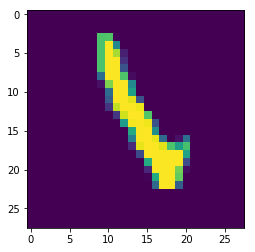

influence 0.012280763753255208
label 1
(784,)


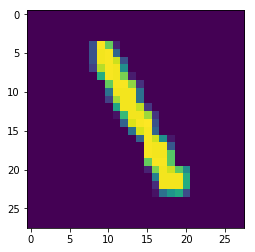

influence 0.012608863321940104
label 1
(784,)


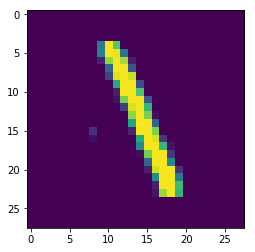

influence 0.013519182332356772
label 1
(784,)


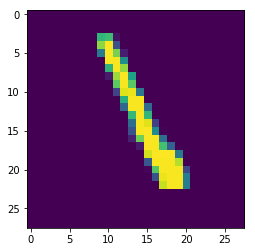

influence 0.01360389404296875
label 1
(784,)


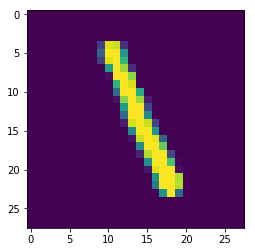

influence 0.015575590006510417
label 1
(784,)


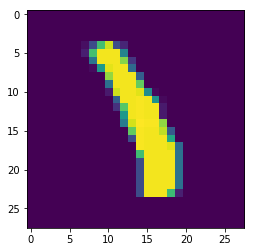

In [16]:
f = plt.figure()
f.canvas.flush_events()
test_results = np.load("../data/all_influence_46.npz")["p"]
time.sleep(5)
test_image = X_test[46]
plt.imshow(test_image.reshape(28,28))

best_idx = np.argsort(test_results)[-10:]
print( np.max(test_results))
print(best_idx)

for i in best_idx:
    print("influence {}".format( test_results[i] ))
    print("label {}".format(y_train[i]))
    x = X_train[i,:].data.numpy()
    print(x.shape)
    plt.imshow(x.reshape(28,28))
    plt.show()
    time.sleep(0.1)
   


In [ ]:
K = np.load("../data/loss_diffs_8.npz")["r"]
plt.plot(K.item()['predicted_loss'], K.item()['actual_loss'])